# Time Series

To begin, let's look at some time series data plots.

In [56]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)

In [57]:
# Define a function that will help us load and
# clean up a dataset.

def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['counts']
    df['counts'] = df['counts'].str.replace('<1', '0').astype(int)
    return df

In [58]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})


In [59]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [36]:
np.random.shuffle(trends)


In [37]:
trend_dfs = [load_trend(**trend) for trend in trends]


The ** syntax is used to pass keywords and values in dictionary form to a function. For more on * and ** (*args and **kwargs), see this page.

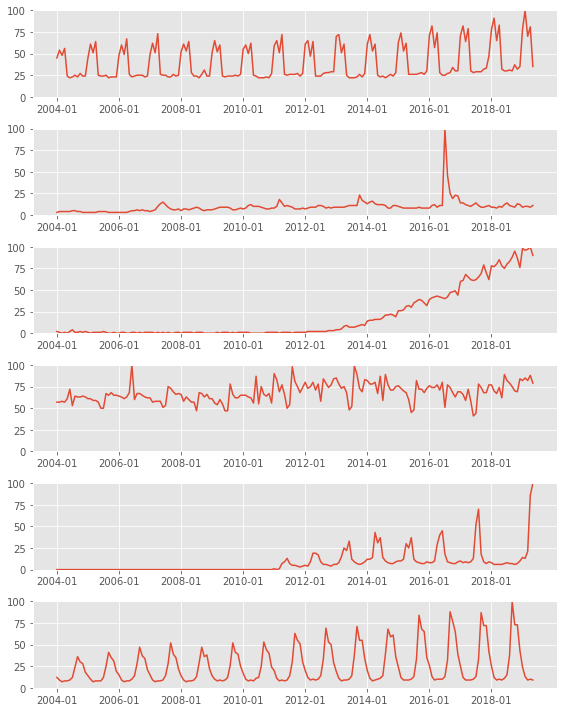

In [38]:
import matplotlib.pyplot as plt
# Let's see if we can guess which is which just by looking
# at their graphs.


import matplotlib; matplotlib.style.use('ggplot')

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    #ax.set_title(str(trends[i]))
    ax.plot(np.array(trend_df.index), trend_df['counts'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

# Time Series vs. Linear

For linear regression, we attempted to explain the variance of a continuous target variable via a set of independent predictor features. We assumed that there was no autocorrelation amongst our records.  In other words, we did not use the target variable of one row to predict that of another.

In time series models, we make the opposite assumption.  We assume that a given value can best be predicted by its past values.

We replace our features with past values of our target. 

The models we will cover in lecture include endogenous variables.
<em>Endogenous</em> means caused by factors within the system. 

<em>Exogenous</em>, caused by factors outside the system. 

Many statsmodels tools use <tt>endog</tt> to represent the incoming time series data in place of the constant <tt>y</tt>.<br>

For more information, visit http://www.statsmodels.org/stable/endog_exog.html

# Datetime objects

Datetime objects make our time series modeling lives easier.  They will allow us to perform essential data prep tasks with a few lines of code.  

We need our timeseries index to be datetime objects, since our models will rely on being able to identify the previous chronological value.

Let's import a Chicago dataset on gun related crimes. 

There is a datetime [library](https://docs.python.org/2/library/datetime.html), and inside pandas there is a datetime module as well as a to_datetime() function.


Let's import some data on gun violence in Chicago.

In [60]:
ts = pd.read_csv('data/Gun_Crimes_Heat_Map.csv')

In [40]:
ts.head()

ID Case Number                    Date                Block  IUCR  \
0  11236423    JB159764  02/10/2018 08:00:00 AM  130XX S LANGLEY AVE  051A   
1  10568438    HZ316534  06/20/2016 10:18:00 PM      024XX E 71ST ST  031A   
2  10394395    HY298019  06/11/2015 08:28:00 PM    058XX S UNION AVE  143A   
3  10370206    HY400660  08/28/2015 11:06:00 AM  039XX W GRENSHAW ST  143A   
4  10300408    HY397968  08/26/2015 09:30:00 AM  041XX W MAYPOLE AVE  143A   

        Primary Type               Description Location Description  Arrest  \
0            ASSAULT       AGGRAVATED: HANDGUN               STREET   False   
1            ROBBERY            ARMED: HANDGUN             SIDEWALK   False   
2  WEAPONS VIOLATION  UNLAWFUL POSS OF HANDGUN            RESIDENCE   False   
3  WEAPONS VIOLATION  UNLAWFUL POSS OF HANDGUN            APARTMENT   False   
4  WEAPONS VIOLATION  UNLAWFUL POSS OF HANDGUN             SIDEWALK   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0     False  ...   9.0              54       04A           NaN          NaN   
1     False  ...   7.0              43        03           NaN          NaN   
2     False  ...   3.0              68        15           NaN          NaN   
3     False  ...  24.0              29        15           NaN          NaN   
4     False  ...  28.0              26        15           NaN          NaN   

   Year              Updated On  Latitude Longitude  Location  
0  2018  02/22/2018 03:58:56 PM       NaN       NaN       NaN  
1  2016  06/27/2016 03:51:44 PM       NaN       NaN       NaN  
2  2015  07/22/2016 03:49:06 PM       NaN       NaN       NaN  
3  2015  08/04/2016 03:52:47 PM       NaN       NaN       NaN  
4  2015  06/17/2016 03:52:24 PM       NaN       NaN       NaN  

[5 rows x 22 columns]

There are a few ways to reindex our series to datetime. 

We can use the pd.to_datetime() method

In [62]:
ts.set_index(pd.to_datetime(ts['Date']), drop=True, inplace=True)

Or, we can parse the dates directly on import

In [82]:
ts =  pd.read_csv('data/Gun_Crimes_Heat_Map.csv', index_col='Date', parse_dates=True)

We've covered some of the fun abilities of datetime objects, including being able to extract componenets of the date like so:

In [83]:
ts.index[0].month

2

In [84]:
ts.index[0].year

2018

Now we will explore new abilities, such as **resampling**.

To create our timeseries, we will count the number of gun offenses reported per day.

In [85]:
ts.resample('D')

Take a moment to familiarize yourself with the differnece resampling aliases

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

When resampling, we have to provide a rule to resample by, and an aggregate function.

**To upsample** is to increase the frequency of the data of interest.  
**To downsample** is to decrease the frequency of the data of interest.

For our purposes, we will downsample, an  count the number of occurences per day.

In [86]:
ts.resample('D').count()

ID  Case Number  Block  IUCR  Primary Type  Description  \
Date                                                                  
2014-01-01  50           50     50    50            50           50   
2014-01-02  33           33     33    33            33           33   
2014-01-03  24           24     24    24            24           24   
2014-01-04  32           32     32    32            32           32   
2014-01-05  17           17     17    17            17           17   
...         ..          ...    ...   ...           ...          ...   
2020-06-21  52           52     52    52            52           52   
2020-06-22  66           66     66    66            66           66   
2020-06-23  48           48     48    48            48           48   
2020-06-24  58           58     58    58            58           58   
2020-06-25  46           46     46    46            46           46   

            Location Description  Arrest  Domestic  Beat  ...  Ward  \
Date                                                      ...         
2014-01-01                    50      50        50    50  ...    50   
2014-01-02                    33      33        33    33  ...    33   
2014-01-03                    24      24        24    24  ...    24   
2014-01-04                    32      32        32    32  ...    32   
2014-01-05                    17      17        17    17  ...    17   
...                          ...     ...       ...   ...  ...   ...   
2020-06-21                    52      52        52    52  ...    52   
2020-06-22                    66      66        66    66  ...    66   
2020-06-23                    48      48        48    48  ...    48   
2020-06-24                    58      58        58    58  ...    58   
2020-06-25                    46      46        46    46  ...    46   

            Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
Date                                                                     
2014-01-01              50        50            50            50    50   
2014-01-02              33        33            33            33    33   
2014-01-03              24        24            24            24    24   
2014-01-04              32        32            32            32    32   
2014-01-05              17        17            17            17    17   
...                    ...       ...           ...           ...   ...   
2020-06-21              52        52            52            52    52   
2020-06-22              66        66            66            66    66   
2020-06-23              48        48            48            48    48   
2020-06-24              58        58            58            58    58   
2020-06-25              46        46            46            46    46   

            Updated On  Latitude  Longitude  Location  
Date                                                   
2014-01-01          50        50         50        50  
2014-01-02          33        33         33        33  
2014-01-03          24        24         24        24  
2014-01-04          32        32         32        32  
2014-01-05          17        17         17        17  
...                ...       ...        ...       ...  
2020-06-21          52        52         52        52  
2020-06-22          66        66         66        66  
2020-06-23          48        48         48        48  
2020-06-24          58        58         58        58  
2020-06-25          46        46         46        46  

[2368 rows x 21 columns]

Our time series will consist of a series of counts of gun reports per day.

In [87]:
# ID is unimportant. We could have chosen any column, since the counts are the same.
ts = ts.resample('D').count()['ID']

In [88]:
ts

Date
2014-01-01    50
2014-01-02    33
2014-01-03    24
2014-01-04    32
2014-01-05    17
              ..
2020-06-21    52
2020-06-22    66
2020-06-23    48
2020-06-24    58
2020-06-25    46
Freq: D, Name: ID, Length: 2368, dtype: int64

Let's visualize our timeseries with a plot.

Text(0, 0.5, 'Reported Gun Crimes')

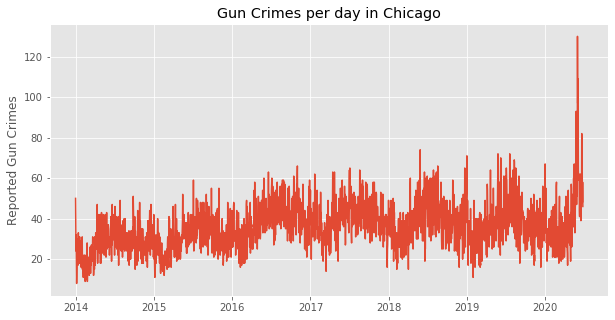

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ts.index, ts.values)
ax.set_title('Gun Crimes per day in Chicago')
ax.set_ylabel('Reported Gun Crimes')

There seems to be some abnormal activity happening towards the end of our series.

[sun-times](https://chicago.suntimes.com/crime/2020/6/8/21281998/chicago-deadliest-day-violence-murder-history-police-crime)

In [90]:
ts.sort_values(ascending=False)[:10]

Date
2020-05-31    130
2020-06-02    109
2020-06-01     97
2020-06-03     95
2020-05-25     93
2020-06-20     82
2020-05-24     77
2018-05-28     74
2019-05-26     72
2019-07-20     72
Name: ID, dtype: int64

Let's treat the span of days from 5-31 to 6-03 as outliers. 

There are several ways to do this, but let's first remove the outliers, and populate an an empty array with the original date range.  That will introduce us to the pd.date_range method.

In [91]:
daily_count = ts[ts < 90]
ts_dr = pd.date_range(daily_count.index[0], daily_count.index[-1])
ts_daily = np.empty(shape=len(ts_dr))
ts_daily = pd.Series(ts_daily)
ts_daily = ts_daily.reindex(ts_dr)
ts = ts_daily.fillna(daily_count)

In [92]:
ts

2014-01-01    50.0
2014-01-02    33.0
2014-01-03    24.0
2014-01-04    32.0
2014-01-05    17.0
              ... 
2020-06-21    52.0
2020-06-22    66.0
2020-06-23    48.0
2020-06-24    58.0
2020-06-25    46.0
Freq: D, Length: 2368, dtype: float64

Now let's sp

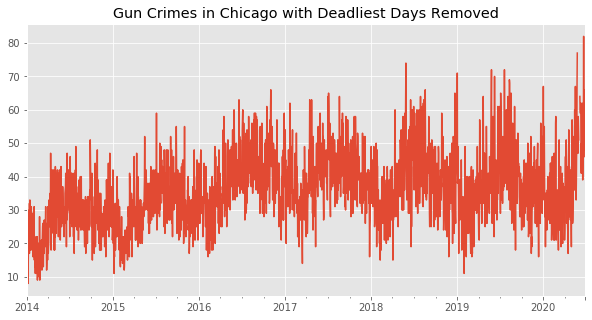

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
ts.plot(ax=ax)
ax.set_title('Gun Crimes in Chicago with Deadliest Days Removed');

Let's zoom in on that week again

Text(0.5, 1.0, 'We have some gaps now')

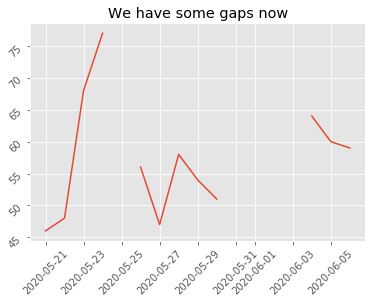

In [100]:
fig, ax = plt.subplots()
ax.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax.tick_params(rotation=45)
ax.set_title('We have some gaps now')

The datetime object allows us several options of how to fill those gaps:

Text(0.5, 1.0, 'Original')

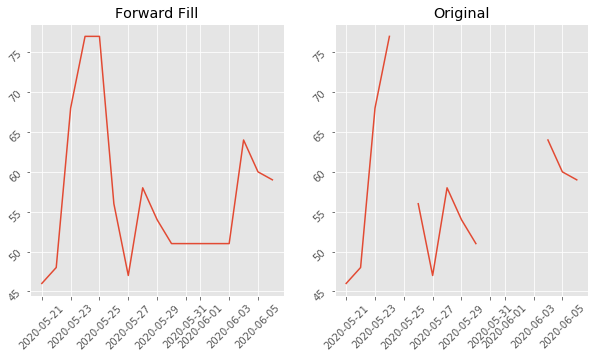

In [105]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(ts.ffill()[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax1.tick_params(rotation=45)
ax1.set_title('Forward Fill')

ax2.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax2.tick_params(rotation=45)
ax2.set_title('Original')


Text(0.5, 1.0, 'Original')

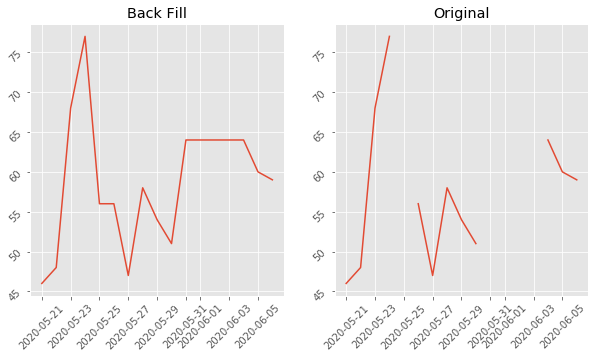

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(ts.bfill()[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax1.tick_params(rotation=45)
ax1.set_title('Back Fill')

ax2.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax2.tick_params(rotation=45)
ax2.set_title('Original')

Text(0.5, 1.0, 'We have some gaps now')

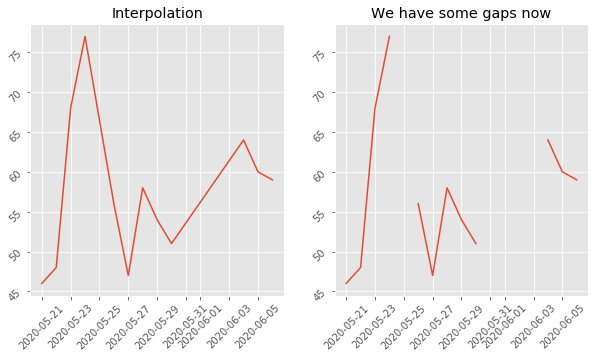

In [109]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(ts.interpolate()[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax1.tick_params(rotation=45)
ax1.set_title('Interpolation')

ax2.plot(ts[(ts.index > '2020-05-20') 
                 & (ts.index < '2020-06-07')]
       )
ax2.tick_params(rotation=45)
ax2.set_title('Original')

Let's proceed with the interpolated data

In [113]:
ts = ts.interpolate()
ts.isna().sum()

0

Let's begin considering some models for our data.

These are not useful for prediction just yet, but they will lead us towards our prediction models.

# Simple Moving Average

A simple moving average consists of an average across a specified window of time. 

The datetime index allows us to calculate simple moving averages via the rolling function.

Let's calculate a week long rolling average

In [125]:
ts.rolling(7).mean()[:10]

2014-01-01          NaN
2014-01-02          NaN
2014-01-03          NaN
2014-01-04          NaN
2014-01-05          NaN
2014-01-06          NaN
2014-01-07    25.428571
2014-01-08    21.142857
2014-01-09    19.428571
2014-01-10    19.285714
Freq: D, dtype: float64

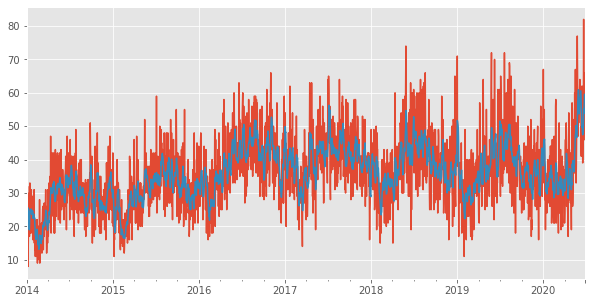

In [128]:
# Drop the NaN's that occur because their aren't enough values for the window
sma_week = ts.rolling(7).mean().dropna()

fig, ax = plt.subplots(figsize=(10,5))

ts.plot(ax=ax)
sma_week.plot(ax=ax)

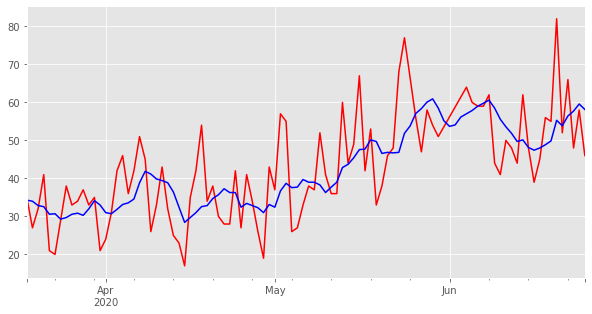

In [132]:
# Let's zoom in

fig, ax = plt.subplots(figsize=(10,5))

ts[-100:].plot(ax=ax, c='r')
sma_week[-100:].plot(ax=ax, c='b')


The simple moving avereage tracks fairly well, but does not reach to the peaks and valleys of the original distribution.

# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:

* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

EWMA gives greater weight to values closer to the point of interest.

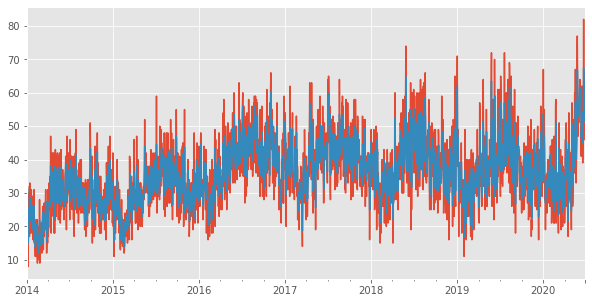

In [147]:
ts_ewm = ts.ewm(span=3).mean()

fig, ax = plt.subplots(figsize=(10,5))

ts.plot(ax=ax)
ts_ewm.plot(ax=ax)

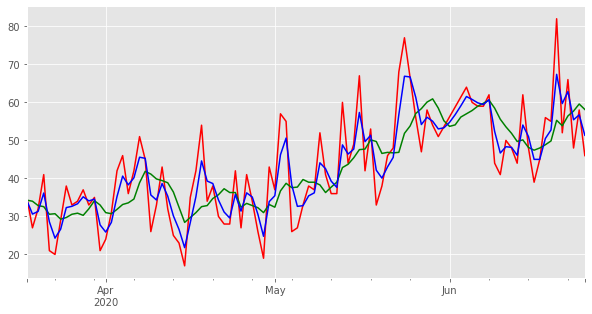

In [148]:

fig, ax = plt.subplots(figsize=(10,5))

ts[-100:].plot(ax=ax, c='r')
sma_week[-100:].plot(ax=ax, c='g')
ts_ewm[-100:].plot(ax=ax, c='b')

Moving averages capture some information about our timeseries.  They show us how windows of past data points inform the data point in question.  They won't, however, allow us to predict in to the future beyond a straight line from the last point.  They also won't capture important trends in our dataset.


Let's plot our rolling statistics with some different windows

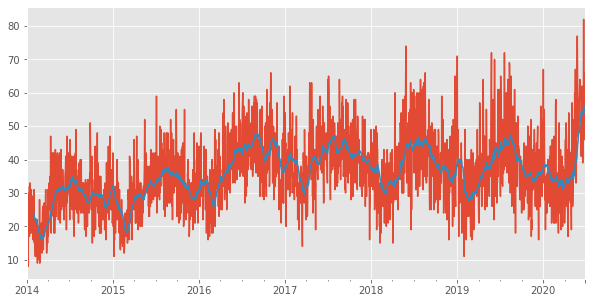

In [158]:
sma_week = ts.rolling(30).mean().dropna()

fig, ax = plt.subplots(figsize=(10,5))

ts.plot(ax=ax)
sma_week.plot(ax=ax)

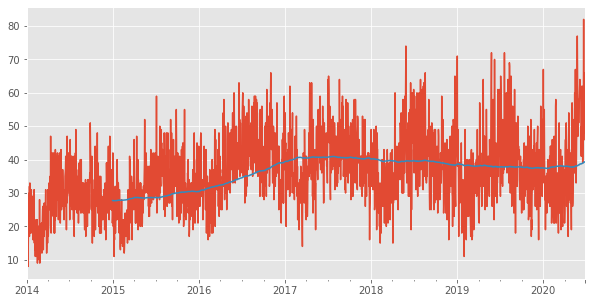

In [159]:
sma_week = ts.rolling(365).mean().dropna()

fig, ax = plt.subplots(figsize=(10,5))

ts.plot(ax=ax)
sma_week.plot(ax=ax)

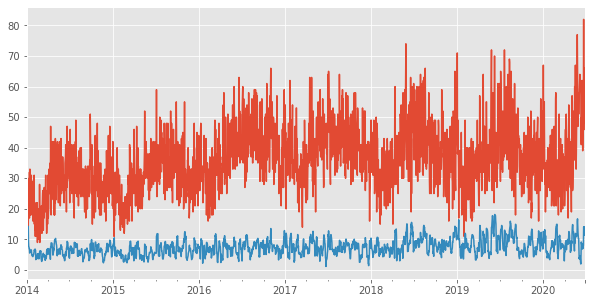

In [162]:
sma_week = ts.rolling(7).std().dropna()

fig, ax = plt.subplots(figsize=(10,5))

ts.plot(ax=ax)
sma_week.plot(ax=ax)

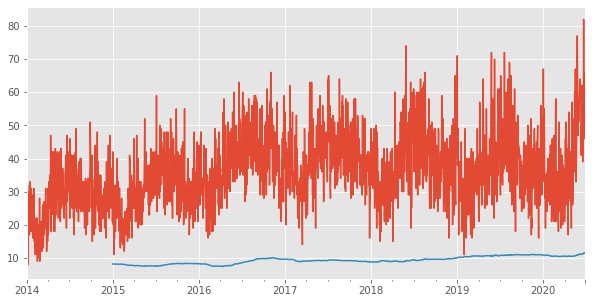

In [167]:
sma_week = ts.rolling(365).std().dropna()

fig, ax = plt.subplots(figsize=(10,5))

ts.plot(ax=ax)
sma_week.plot(ax=ax)

Especially with the yearly moving average, we can see that there is an upward trend in the mean of our data through 2017.   

If we zoom in on our standard deviation, we can see also that there is a slight upward trend in our variance as well.

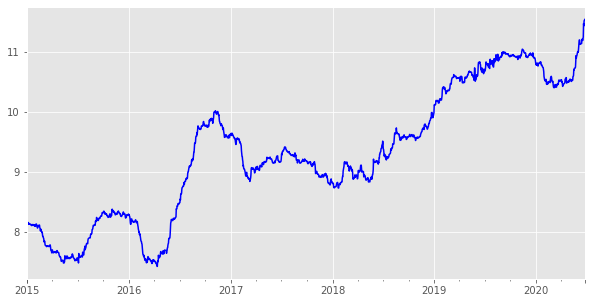

In [170]:
sma_week = ts.rolling(365).std().dropna()

fig, ax = plt.subplots(figsize=(10,5))

sma_week.plot(ax=ax, c='b')

### Components of Time Series Data
A time series in general is supposed to be affected by four main components, which can be separated from the observed data. These components are: *Trend, Cyclical, Seasonal and Irregular* components.

- **Trend** : The long term movement of a time series. For example, series relating to population growth, number of houses in a city etc. show upward trend.
- **Seasonality** : Fluctuation in the data set that follow a regular pattern due to outside influences. For example sales of ice-cream increase in summer, or daily web traffic.
- **Cyclical** : When data exhibit rises and falls that are not of fixed period.  Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.
- **Irregular**: Are caused by unpredictable influences, which are not regular and also do not repeat in a particular pattern. These variations are caused by incidences such as war, strike, earthquake, flood, revolution, etc. There is no defined statistical technique for measuring random fluctuations in a time series.


*Note: Many people confuse cyclic behaviour with seasonal behaviour, but they are really quite different. If the fluctuations are not of fixed period then they are cyclic; if the period is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.*

The statsmodels seasonal decompose can also help show us the trends in our data.

<Figure size 432x288 with 0 Axes>

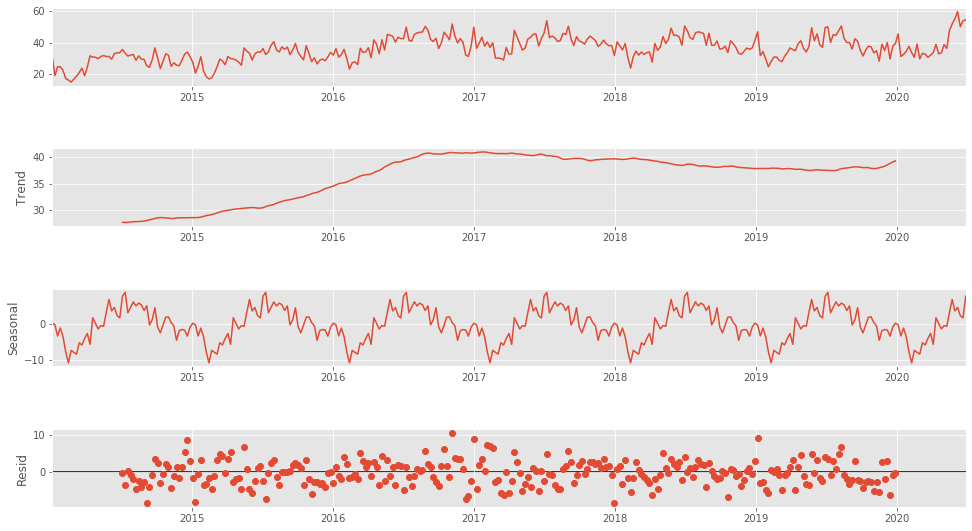

In [196]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.resample('w').mean())
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

### Statistical stationarity: 

When building our models, we will want to account for these trends somehow.  Time series whose mean and variance have trends across time will be difficult to predict out into the future. 

A **stationary time series** is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  


<h3 style="text-align: center;">Constant Mean</p>



<img src='img/mean_nonstationary.webp'/>

<h3 style="text-align: center;">Constant Variance</p>


<img src='img/variance_nonstationary.webp'/>


<h3 style="text-align: center;">Constant Covariance</p>


<img src='img/covariance_nonstationary.webp'/>

While we can get a sense of how stationary our data is with visuals, the Dickey Fuller test gives us a quantitatitive measure.

Here the null hypothesis is that the TS is non-stationary. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [201]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


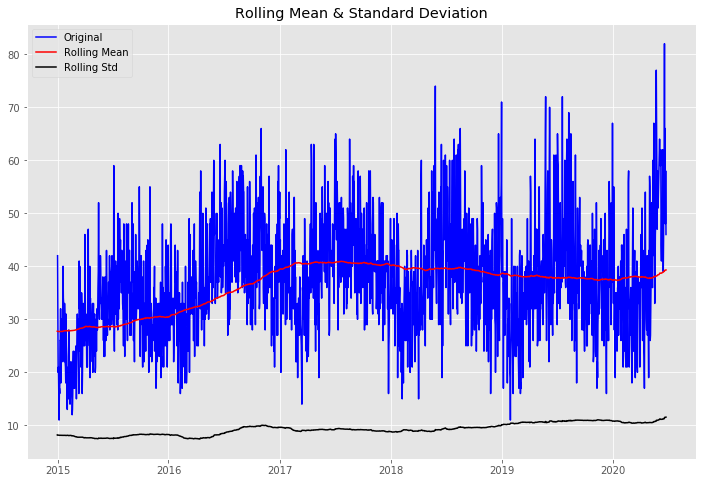

Results of Dickey-Fuller Test:
Test Statistic                   -2.851242
p-value                           0.051319
#Lags Used                       27.000000
Number of Observations Used    2340.000000
Critical Value (1%)              -3.433148
Critical Value (5%)              -2.862776
Critical Value (10%)             -2.567428
dtype: float64


In [203]:
test_stationarity(ts, 365)

As we concluded visually, our original timeseries does not pass the test of stationarity.

### How to Stationarize time series data

A series of steps can be taken to stationarize your data - also known -  as removing trends (linear trends, seasonaility/periodicity, etc - more details on transformations <a href='http://people.duke.edu/~rnau/whatuse.htm'>here</a>).


One way to remove trends is to difference our data.  
Differencing is performed by subtracting the previous observation (lag=1) from the current observation.

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

Let's difference our data and see if it improves Dickey-Fuller Test

In [206]:
ts.diff().dropna()

2014-01-02   -17.0
2014-01-03    -9.0
2014-01-04     8.0
2014-01-05   -15.0
2014-01-06    -9.0
              ... 
2020-06-21   -30.0
2020-06-22    14.0
2020-06-23   -18.0
2020-06-24    10.0
2020-06-25   -12.0
Freq: D, Length: 2367, dtype: float64

In [208]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


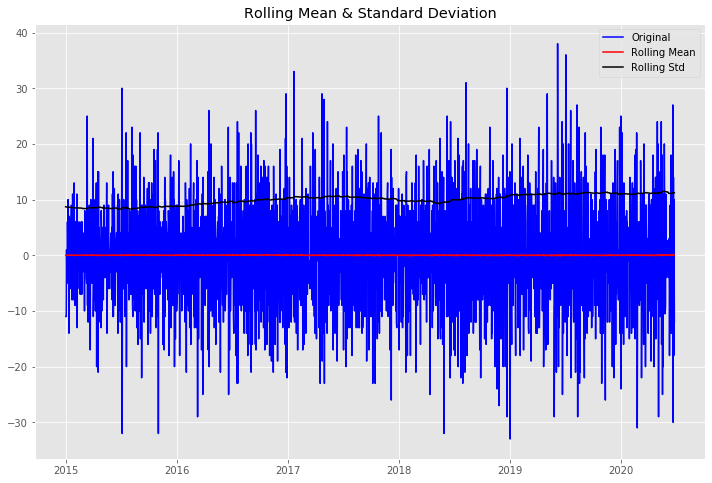

Results of Dickey-Fuller Test:
Test Statistic                -1.507505e+01
p-value                        8.614781e-28
#Lags Used                     2.600000e+01
Number of Observations Used    2.340000e+03
Critical Value (1%)           -3.433148e+00
Critical Value (5%)           -2.862776e+00
Critical Value (10%)          -2.567428e+00
dtype: float64


In [212]:
test_stationarity(ts.diff().dropna(), 365)

One we have achieved stationarity the next step in fitting a model to address any autocorrelation that remains in the differenced series. 

Sometimes, we have to difference the differenced data (known as a second difference) to achieve stationary data. <b>The number of times we have to difference our data is the order of differencing</b> - we will use this information when building our model.

One we have achieved stationarity the next step in fitting a model is to address any autocorrelation that remains in the differenced series. 